<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/8-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 가중치 시각화

In [2]:
from tensorflow import keras

In [3]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-02-12 15:26:52--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-02-12 15:26:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.05s   

2025-02-12 15:26:53 (73.5 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [4]:
model = keras.models.load_model('best-cnn-model.keras')

In [5]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

이전 절에서 했던거 불러오기

In [6]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


커널 크기 (3,3,1) 필터 개수 32  
weights의 첫번째 원소인 가중치의 크기는 (3,3,1,32)  
weights의 두번째 원소는 절편의 개수 (32,)

In [7]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.014383553 0.23351653


나중에 훈련하기 전 가중치랑 비교할거임

In [8]:
import matplotlib.pyplot as plt

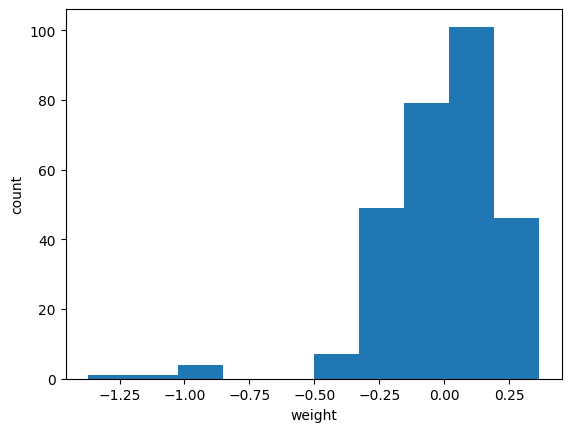

In [9]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

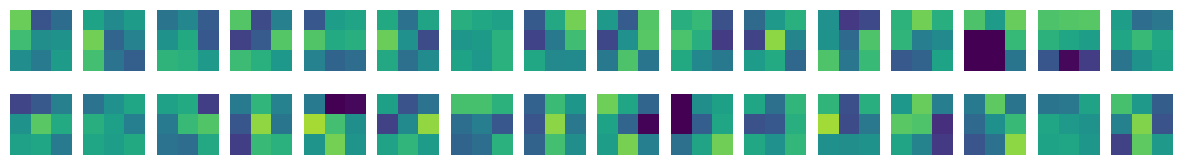

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

가중치 시각화해서 출력

In [11]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


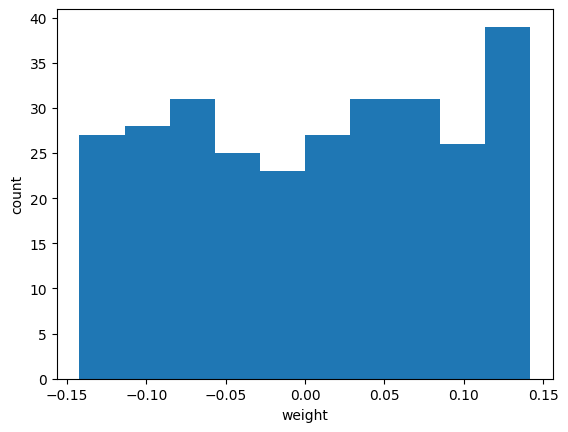

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

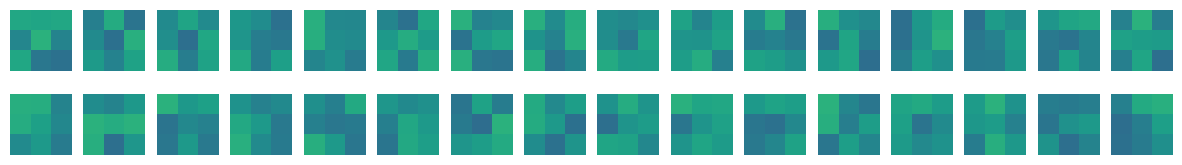

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

훈련 안한 모델과 비교  
텐서플로가 신경망 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 선택하므로 비교적 균일함

## 함수형 API

sequential 클래스는 층을 차례대로 쌓은 모델을 만듬  
입력이나 출력이 여러 개면 sequential 클래스 사용하기 어려울 수 있음 -> 이때 함수형 API 사용

직접 원하는대로 구조를 유연하게 정의하고, 다중 출력/입력을 가능하게 함  
각 층이 독립된 객체로 생성되므로, 재사용 및 조작이 가능

In [16]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [17]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

model.input과 model.layers[0].output을 연결하는 새로운 모델 생성

## 특성 맵 시각화

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


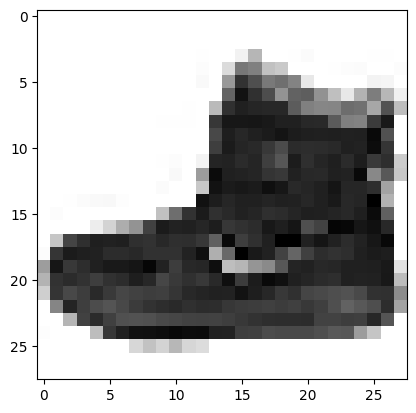

In [19]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩, 32개 필터  
첫번째 차원은 배치 차원( 한 번에 몇 개의 데이터를 처리할 것인지 결정하는 차원)

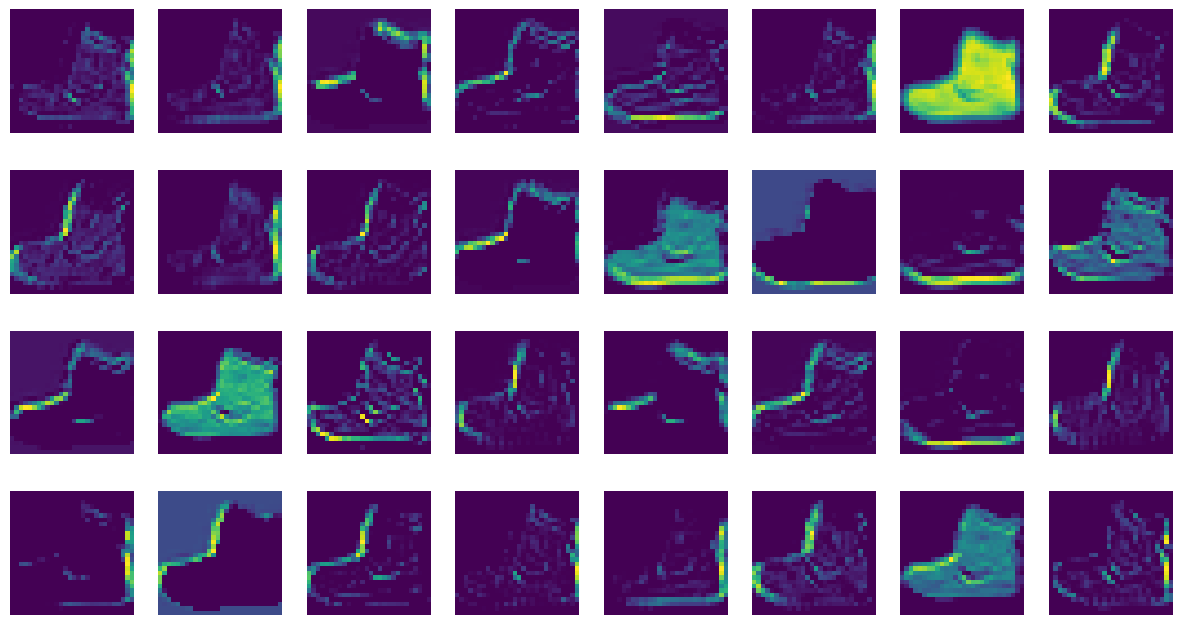

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분 보여줌

In [23]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [24]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


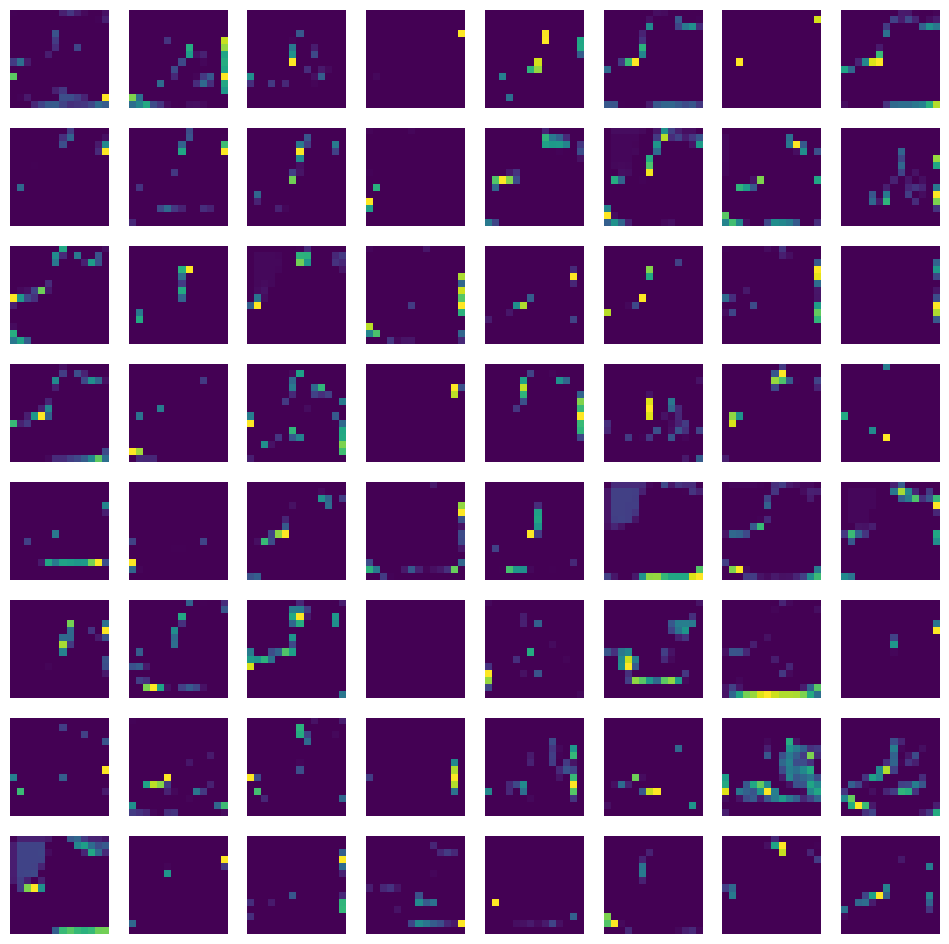

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

얘는 시각적으로 이해하기 힘듬  
✔ 첫 번째 합성곱 층에서는 엣지(경계선)와 같은 단순한 특징을 감지한다.  
✔ 중간 합성곱 층에서는 얼굴의 일부분, 특정 텍스처 등의 패턴을 감지한다.  
✔ 깊은 합성곱 층에서는 개, 자동차, 사람과 같은 고수준의 개념을 감지한다.  
처음에는 선과 패턴이 분명하지만, 나중에는 신경망이 고유한 방식으로 데이터를 변환하여 학습하기 때문에 사람이 직관적으로 이해하기 어려움  
CNN이 깊어질수록 감지하는 패턴이 점점 추상화되기 때문에, 특성 맵이 원본 이미지와 직접적인 연관성을 유지하지 않음